<span style='color:#666666'> FABIANA ARCA CRUZ TORTORELLI  </span>


***

# Retail Company Analysis

Retail companies are businesses that sell goods and services directly to consumers. They play a crucial role in the supply chain by providing a range of products to the end user, often through physical stores or online platforms. Retailers can range from small, specialized boutiques to large, multinational chains. Their primary functions include purchasing goods from manufacturers or wholesalers, managing inventory, and selling to consumers at various price points.



## Project Description

The goal of this work is to answer the following 10 business questions about a dataset of a Retail Company located in EUA.

- **Question 1:** Which City has the Highest Sales Value for Products in the 'Office Supplies' Category?
- **Question 2:** What is the Total Sales by Order Date?
- **Question 3:** What is the Total Sales by State?
- **Question 4:** What are the Top 10 Cities with the Highest Total Sales?
- **Question 5:** Which Segment Had the Highest Total Sales?
- **Question 6:** What is the Total Sales by Segment and by Year?
- **Question 7:** The company managers are considering offering different discount tiers and would like to run a simulation based on the following rule:
  
    - If the Sales Value is greater than 1000, it receives a 15% discount.
    - If the Sales Value is less than 1000, it receives a 10% discount.
    
      How many Sales would receive a 15% discount?
- **Question 8:** Assume the company decides to grant a 15% discount from the previous item. What would be the average Sales Value before and after the discount?
- **Question 9:** What is the Average Sales by Segment, by Year, and by Month?
- **Question 10:** What is the Total Sales by Category and SubCategory, Considering Only the Top 12 SubCategories?
  

**The dataset is given by the course named "Fundamentos de Linguagem Python Para Análise de Dados e Data Science" from [Data Science Academy](https://www.datascienceacademy.com.br/path-player?courseid=fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science&unit=642bac12d1798ca10e00c703Unit)**

***

# Exploratory Data Analysis

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import scipy.stats as stats
from scipy.stats import f_oneway 
import pingouin as pg 

### Load dataset

In [2]:
df = pd.read_csv(r'/dataset.csv')
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Summarize main characteristics

In [3]:
def first_checking(data):
    display(Markdown('**--------- Basic information ---------**\n'))
    
    # Shape
    print(f'1. The dataset has {data.shape[0]} rows and {data.shape[1]} columns \n')

    # Information about null, dtype
    print('2. Info')
    print(data.info())
    print('\n')
    var_cont = data.select_dtypes(include=['float','int'])
    numeric_features = var_cont.columns
    var_cat = df.select_dtypes(include='object')
    categ_features = var_cat.columns
    
    display(Markdown('**Numerical features:**'))
    for i in numeric_features:
        print('--->',i)
    print('\n')
    display(Markdown('**Categorical features:**'))
    for i in categ_features:
        print('--->',i)
    print('\n')
    
    # Null
    null_aux = data.isnull().sum().reset_index().rename(columns={'index':'columns',0:'values'})
    null_aux = null_aux[null_aux['values'] > 0]
    if len(null_aux.values) == 0:
        print(f'3. There are 0 (0%) columns with missing value.')
    else:
        print(f'3. There are {len(null_aux.values)} ({round((len(null_aux.values)/data.shape[1])*100,2)}%) columns with missing value. The columns are:\n')
        null_aux['Perc Missing'] = round((null_aux['values']/data.shape[0])*100,2).astype(str) + '%'
        display(null_aux)
    print('\n')

    # Duplicated
    print('4. Duplicated values:\n')
    print((data.duplicated()).value_counts())

    # Unique value
    print('\n')
    print('5. Unique value:')
    display(data.nunique().reset_index().rename(columns={'index':'columns',0:'values'}))

    # Describe
    print('\n')
    print('6. Describe - numeric variable:')
    display(data.describe())

In [4]:
first_checking(df)

**--------- Basic information ---------**


1. The dataset has 9700 rows and 11 columns 

2. Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB
None




**Numerical features:**

---> Valor_Venda




**Categorical features:**

---> ID_Pedido
---> Data_Pedido
---> ID_Cliente
---> Segmento
---> Pais
---> Cidade
---> Estado
---> ID_Produto
---> Categoria
---> SubCategoria


3. There are 0 (0%) columns with missing value.


4. Duplicated values:

False    9700
Name: count, dtype: int64


5. Unique value:


,columns,values
0,ID_Pedido,4874
1,Data_Pedido,1226
2,ID_Cliente,793
3,Segmento,3
4,Pais,1
5,Cidade,528
6,Estado,49
7,ID_Produto,1861
8,Categoria,3
9,SubCategoria,17




6. Describe - numeric variable:


,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


### Univariate Analysis

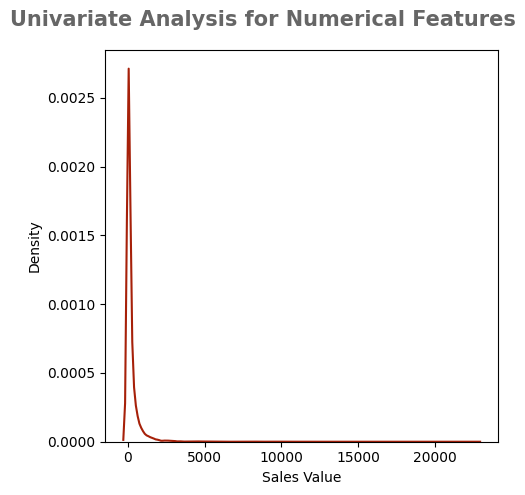

In [5]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram (see Seaborn documentation)
def KDE_numer(data):

    # Figure size and title
    plt.figure(figsize=(5,5))
    plt.suptitle('Univariate Analysis for Numerical Features',fontsize=15,fontweight='bold',alpha=0.6)

    # Select numeric variables
    var_cont = data.select_dtypes(include=['float','int'])
    numeric_features = var_cont.columns

    # Plot
    for i in range(len(numeric_features)):
        sns.kdeplot(x=data[numeric_features[i]],color='#a62009')#'#018571')
        plt.xlabel('Sales Value')
        plt.tight_layout()
        plt.savefig("uni_analysis.png") # Save the image
KDE_numer(df)

In [6]:
# Checking if outliers need to be removed or corrected

# finding the 1st quartile
q1 = np.quantile(df['Valor_Venda'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Valor_Venda'], 0.75)
med = np.median(df['Valor_Venda'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# outliers
outliers = df[(df['Valor_Venda'] < lower_bound) | (df['Valor_Venda'] > upper_bound)]

# prints
print("IQR Lower Bound:", lower_bound)
print('\n')
print("IQR Upper Bound:", upper_bound)
print('\n')
print("Outliers:")
outliers.head()

IQR Lower Bound: -271.77875


IQR Upper Bound: 498.95925


Outliers:


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.1840
11,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002033,Technology,Phones,911.4240


In [7]:
df[df['Valor_Venda'] > 498.95925]['SubCategoria'].value_counts() 

SubCategoria
Chairs         219
Phones         209
Tables         145
Storage        136
Binders         74
Accessories     68
Machines        65
Bookcases       60
Appliances      55
Copiers         55
Furnishings     30
Supplies        14
Paper            4
Labels           2
Art              1
Envelopes        1
Name: count, dtype: int64

In [8]:
df[df['Valor_Venda'] > 5000]['SubCategoria'].value_counts()

SubCategoria
Machines    7
Copiers     6
Binders     5
Supplies    1
Name: count, dtype: int64

In [9]:
df[df['Valor_Venda'] == df['Valor_Venda'].max()]['SubCategoria'].value_counts() 

SubCategoria
Machines    1
Name: count, dtype: int64

### Categorical features

In [10]:
df['Estado'].value_counts(normalize=True)*100

Estado
California              19.886598
New York                11.257732
Texas                    9.865979
Pennsylvania             5.907216
Washington               5.134021
Illinois                 4.907216
Ohio                     4.608247
Florida                  3.814433
Michigan                 2.597938
North Carolina           2.546392
Arizona                  2.298969
Virginia                 2.206186
Tennessee                1.886598
Colorado                 1.845361
Georgia                  1.814433
Kentucky                 1.402062
Indiana                  1.391753
Massachusetts            1.360825
Oregon                   1.257732
New Jersey               1.226804
Maryland                 1.082474
Wisconsin                1.072165
Delaware                 0.927835
Minnesota                0.917526
Connecticut              0.824742
Missouri                 0.680412
Oklahoma                 0.680412
Alabama                  0.628866
Arkansas                 0.608247
Rhode I

In [11]:
df['Cidade'].value_counts(normalize=True)*100

Cidade
New York City      9.154639
Los Angeles        7.381443
Philadelphia       5.402062
San Francisco      5.113402
Seattle            4.329897
                     ...   
Waukesha           0.010309
Orland Park        0.010309
Pensacola          0.010309
Lake Elsinore      0.010309
San Luis Obispo    0.010309
Name: proportion, Length: 528, dtype: float64

In [12]:
df['cidade_group'] = np.where(df['Cidade'].isin(df['Cidade'].value_counts().index[df['Cidade'].value_counts().values >= 420]), df['Cidade'], 'Other')
df['estado_group'] = np.where(df['Estado'].isin(df['Estado'].value_counts().index[df['Estado'].value_counts().values >= 498]), df['Estado'], 'Other')
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,cidade_group,estado_group
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,Other,Other
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,Other,Other
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,Los Angeles,California


/tmp/ipykernel_39899/1615867224.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{count1[i]}%' for i in range(0,len(count1))]
/tmp/ipykernel_39899/1615867224.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{count2[i]}%' for i in range(0,len(count2))]
/tmp/ipykernel_39899/1615867224.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{count3[i]}%' for i in range(0,len(count3))]
/tmp/ipyke

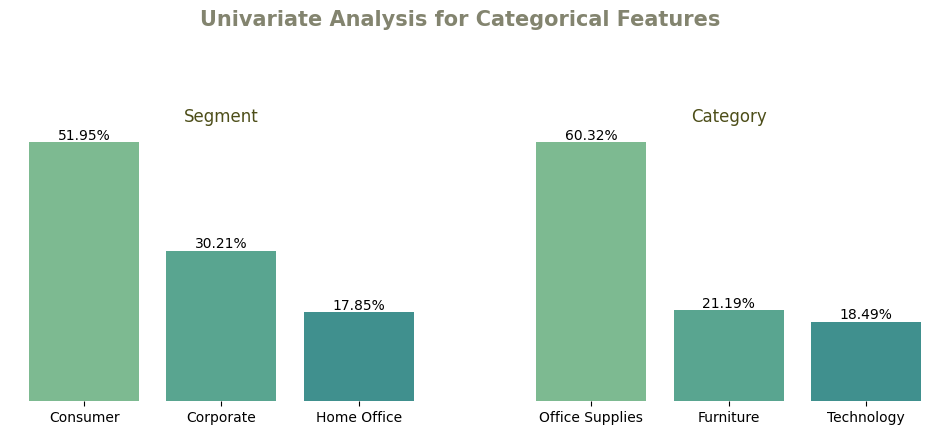

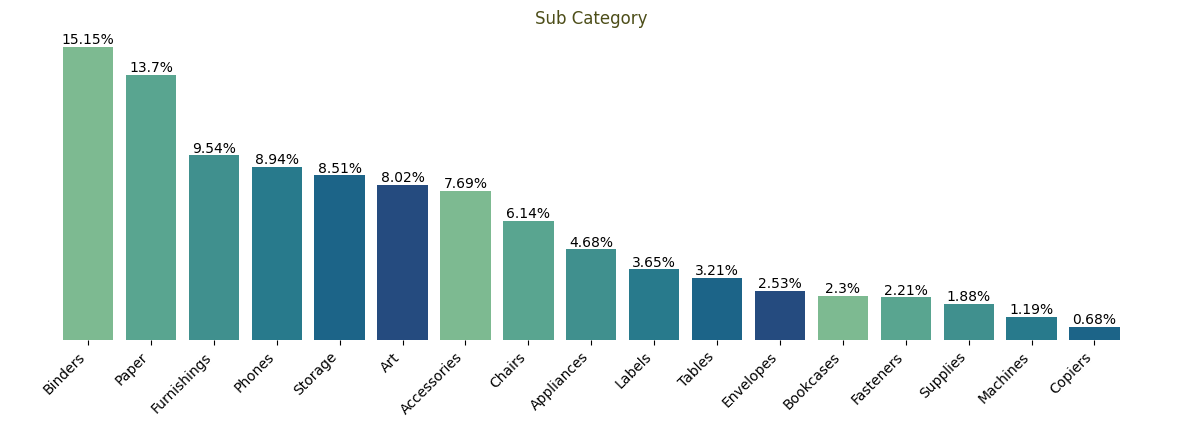

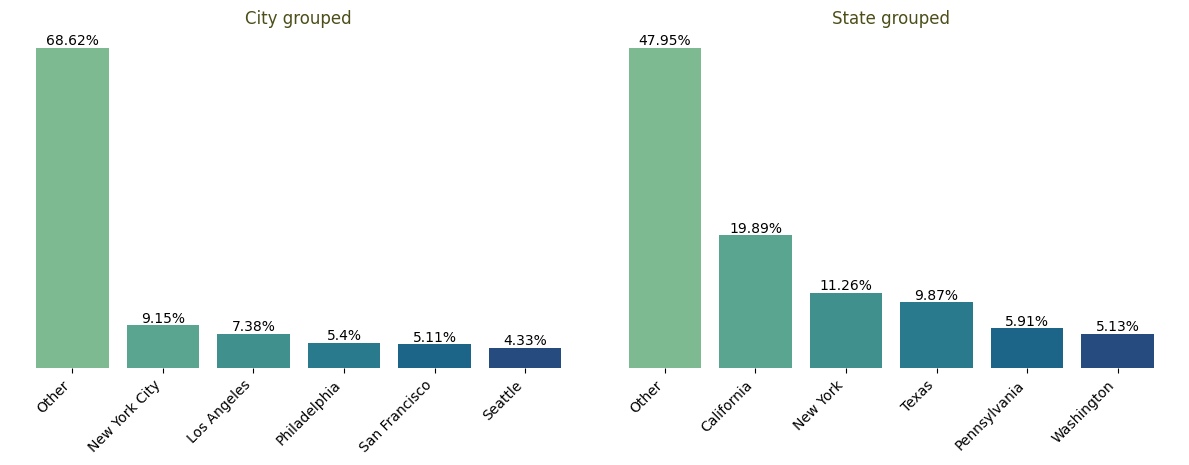

In [13]:
fig = plt.figure(figsize=(12, 12))

# Figure title
plt.suptitle('Univariate Analysis for Categorical Features',fontsize=15,fontweight='bold',alpha=0.6, color='#31330f')

# Color
col = sns.color_palette("crest")
col2 = ['#a62009', col[2], col[5]]

# Plot1
plt.subplot(321)
count1 = round(df['Segmento'].value_counts(normalize=True)*100,2)
ax1 = plt.bar(x=count1.index, height=count1.values, color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Segment', color='#4d4e19')
labels = [f'{count1[i]}%' for i in range(0,len(count1))]
plt.bar_label(ax1,labels=labels)

# Plot2
plt.subplot(322)
count2 = round(df['Categoria'].value_counts(normalize=True)*100,2)
ax2 = plt.bar(x=count2.index, height=count2.values, color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders
#Labels
plt.title('Category', color='#4d4e19')
labels = [f'{count2[i]}%' for i in range(0,len(count2))]
plt.bar_label(ax2,labels=labels)

# Plot3
plt.figure(figsize=(15, 4))
count3 = round(df['SubCategoria'].value_counts(normalize=True)*100,2)
ax3 = plt.bar(x=count3.index, height=count3.values, color=col, width = 0.8)
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False)  # Removing the borders
plt.gca().set_xticks(count3.index, labels=count3.index, rotation=45, ha='right')
#Labels
plt.title('Sub Category', color='#4d4e19')
labels = [f'{count3[i]}%' for i in range(0,len(count3))]
plt.bar_label(ax3,labels=labels)

# Plot4
plt.figure(figsize=(12, 12))
plt.subplot(325)
count4 = round(df['cidade_group'].value_counts(normalize=True)*100,2)
ax4 = plt.bar(x=count4.index, height=count4.values, color=col, width = 0.8)
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False)  # Removing the borders
plt.gca().set_xticks(count4.index, labels=count4.index, rotation=45, ha='right')
#Labels
plt.title('City grouped', color='#4d4e19')
labels = [f'{count4[i]}%' for i in range(0,len(count4))]
plt.bar_label(ax4,labels=labels)

# Plot5
plt.subplot(326)
count5 = round(df['estado_group'].value_counts(normalize=True)*100,2)
ax5 = plt.bar(x=count5.index, height=count5.values, color=col,width = 0.8)
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False)  # Removing the borders
plt.gca().set_xticks(count5.index, labels=count5.index, rotation=45, ha='right')
#Labels
plt.title('State grouped', color='#4d4e19')
labels = [f'{count5[i]}%' for i in range(0,len(count5))]
plt.bar_label(ax5,labels=labels)
        
# layout
plt.tight_layout()

#### Date

In [14]:
# set datetime, year and month
df['Data_Pedido_dt'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')
df['Data_Pedido_dt'] = df['Data_Pedido_dt'].dt.date
df['Data_Pedido_dt'] = pd.to_datetime(df['Data_Pedido_dt'])
df['Data_Pedido_ano'] = df['Data_Pedido_dt'].dt.strftime('%Y')
df['Data_Pedido_mes'] = df['Data_Pedido_dt'].dt.strftime('%m')
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,cidade_group,estado_group,Data_Pedido_dt,Data_Pedido_ano,Data_Pedido_mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,Other,Other,2017-11-08,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,Other,Other,2017-11-08,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,Los Angeles,California,2017-06-12,2017,06


In [15]:
group_date = df['Data_Pedido_mes'].value_counts().reset_index().sort_values(by='Data_Pedido_mes').reset_index()
group_date

,index,Data_Pedido_mes,count
0,10,01,361
1,11,02,290
2,8,03,665
3,9,04,654
4,4,05,714
5,6,06,687
6,7,07,687
7,5,08,689
8,2,09,1348
9,3,10,801


/tmp/ipykernel_39899/1991546086.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{count1[i]}%' for i in range(0,len(count1))]


[Text(0, 0, '3.72%'),
 Text(0, 0, '2.99%'),
 Text(0, 0, '6.86%'),
 Text(0, 0, '6.74%'),
 Text(0, 0, '7.36%'),
 Text(0, 0, '7.08%'),
 Text(0, 0, '7.08%'),
 Text(0, 0, '7.1%'),
 Text(0, 0, '13.9%'),
 Text(0, 0, '8.26%'),
 Text(0, 0, '14.73%'),
 Text(0, 0, '14.18%')]

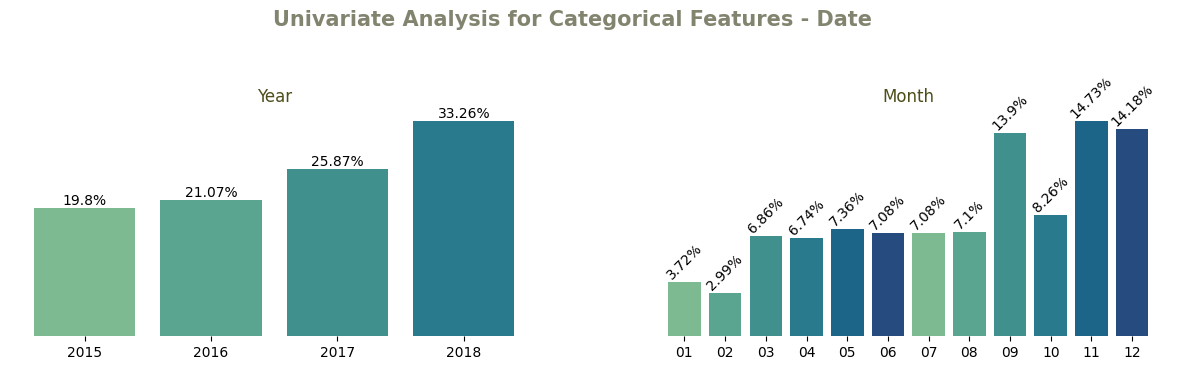

In [16]:
# Plot
plt.figure(figsize=(15, 10))

# Figure title
plt.suptitle('Univariate Analysis for Categorical Features - Date',fontsize=15,fontweight='bold',alpha=0.6, color='#31330f')

# Plot1
plt.subplot(321)
count1 = round(df['Data_Pedido_ano'].value_counts(normalize=True)*100,2).sort_values()
ax1 = plt.bar(x=count1.index, height=count1.values, color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Year', color='#4d4e19')
labels = [f'{count1[i]}%' for i in range(0,len(count1))]
plt.bar_label(ax1,labels=labels)

# Plot2
plt.subplot(322)
count2 = round(df['Data_Pedido_mes'].value_counts(normalize=True)*100,2)
ax2 = plt.bar(x=group_date['Data_Pedido_mes'], height=group_date['count'], color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders
#Labels
plt.title('Month', color='#4d4e19')
labels = [f'{round((group_date["count"][i]/group_date["count"].sum())*100,2)}%' for i in range(0,len(group_date))]
plt.bar_label(ax2,labels=labels, rotation=45)

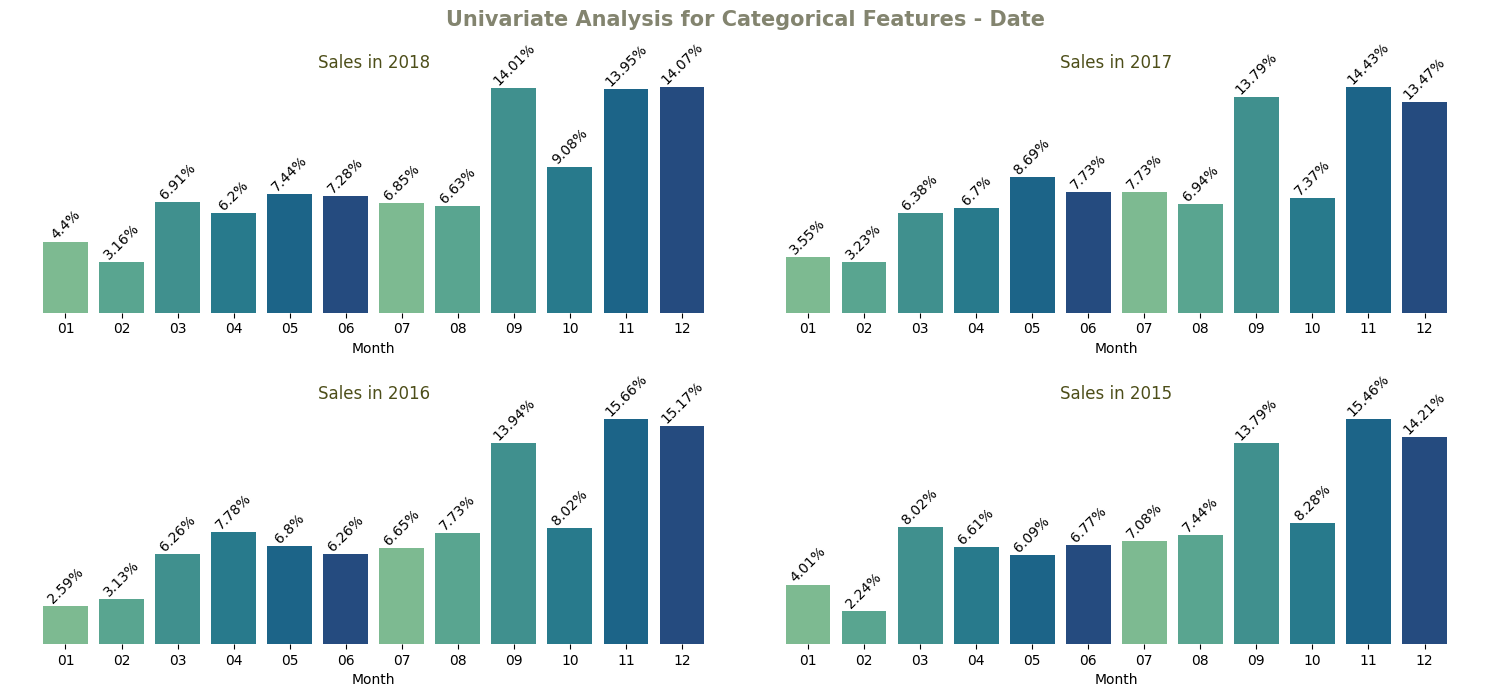

In [17]:
# Plot
plt.figure(figsize=(15, 10))

# Figure title
plt.suptitle('Univariate Analysis for Categorical Features - Date',fontsize=15,fontweight='bold',alpha=0.6, color='#31330f')

# Plot1
plt.subplot(321)
df_2018 = df[df['Data_Pedido_ano'] == '2018']
group_date_2018 = df_2018['Data_Pedido_mes'].value_counts().reset_index().sort_values(by='Data_Pedido_mes').reset_index()
ax1 = plt.bar(x=group_date_2018['Data_Pedido_mes'], height=group_date_2018['count'], color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Sales in 2018', color='#4d4e19')
labels = [f'{round((group_date_2018["count"][i]/group_date_2018["count"].sum())*100,2)}%' for i in range(0,len(group_date))]
plt.bar_label(ax1,labels=labels, rotation=45)
plt.xlabel('Month')

# Plot2
plt.subplot(322)
df_2017 = df[df['Data_Pedido_ano'] == '2017']
group_date_2017 = df_2017['Data_Pedido_mes'].value_counts().reset_index().sort_values(by='Data_Pedido_mes').reset_index()
ax2 = plt.bar(x=group_date_2017['Data_Pedido_mes'], height=group_date_2017['count'], color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Sales in 2017', color='#4d4e19')
labels = [f'{round((group_date_2017["count"][i]/group_date_2017["count"].sum())*100,2)}%' for i in range(0,len(group_date))]
plt.bar_label(ax2,labels=labels, rotation=45)
plt.xlabel('Month')

# Plot3
plt.subplot(323)
df_2016 = df[df['Data_Pedido_ano'] == '2016']
group_date_2016 = df_2016['Data_Pedido_mes'].value_counts().reset_index().sort_values(by='Data_Pedido_mes').reset_index()
ax1 = plt.bar(x=group_date_2016['Data_Pedido_mes'], height=group_date_2016['count'], color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Sales in 2016', color='#4d4e19')
labels = [f'{round((group_date_2016["count"][i]/group_date_2016["count"].sum())*100,2)}%' for i in range(0,len(group_date))]
plt.bar_label(ax1,labels=labels, rotation=45)
plt.xlabel('Month')

# Plot4
plt.subplot(324)
df_2015 = df[df['Data_Pedido_ano'] == '2015']
group_date_2015 = df_2015['Data_Pedido_mes'].value_counts().reset_index().sort_values(by='Data_Pedido_mes').reset_index()
ax2 = plt.bar(x=group_date_2015['Data_Pedido_mes'], height=group_date_2015['count'], color=col,width = 0.8)
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders 
#Labels
plt.title('Sales in 2015', color='#4d4e19')
labels = [f'{round((group_date_2015["count"][i]/group_date_2015["count"].sum())*100,2)}%' for i in range(0,len(group_date))]
plt.bar_label(ax2,labels=labels, rotation=45)
plt.xlabel('Month')

# layout
plt.tight_layout()

### Bivariate Analysis

**Descriptive statistics: central tendency, dispersion and shape, excluding NaN values:**

**Segment**

,Segmento,count,mean,std,min,25%,50%,75%,max
0,Consumer,5039.0,225.011775,591.156475,0.444,17.264,53.700,206.052,13999.96
1,Corporate,2930.0,231.819859,596.830605,0.556,17.310,55.952,212.650,17499.95
2,Home Office,1731.0,244.073618,765.845559,0.990,17.152,52.752,210.275,22638.48


**City**

,cidade_group,count,mean,std,min,25%,50%,75%,max
0,Los Angeles,716.0,239.741108,470.700247,2.880,19.39000,68.988,242.156,4158.912
1,New York City,888.0,283.501373,718.818795,1.728,20.70000,62.268,240.070,11199.968
2,Other,6656.0,222.767559,624.750140,0.444,16.40000,52.408,207.198,22638.480
3,Philadelphia,524.0,204.575960,554.925144,0.852,12.65025,41.008,176.280,8399.976
4,San Francisco,496.0,216.713613,568.434922,0.990,18.69750,48.336,187.899,8187.650
5,Seattle,420.0,273.155900,816.993070,1.344,20.69050,64.870,199.980,13999.960


**State**

,estado_group,count,mean,std,min,25%,50%,75%,max
0,California,1929.0,229.614877,494.360473,0.990,19.4400,60.840,223.9200,8187.650
1,New York,1092.0,278.879488,701.060071,1.240,20.3560,60.045,240.0700,11199.968
2,Other,4651.0,231.414085,683.717559,0.836,17.2020,55.500,209.9745,22638.480
3,Pennsylvania,573.0,199.671344,535.795492,0.852,12.6720,41.472,177.4500,8399.976
4,Texas,957.0,170.898496,423.811262,0.444,10.7800,35.712,156.3728,8159.952
5,Washington,498.0,268.726920,770.177034,1.344,20.6635,65.640,204.0670,13999.960


**Category**

,Categoria,count,mean,std,min,25%,50%,75%,max
0,Furniture,2055.0,348.861704,494.992435,1.892,47.120,181.986,435.2140,4416.174
1,Office Supplies,5851.0,118.799824,383.941886,0.444,11.784,27.360,79.3800,9892.740
2,Technology,1794.0,459.057626,1122.194858,0.990,67.983,167.960,464.7275,22638.480


**Subcategory**

,SubCategoria,count,mean,std,min,25%,50%,75%,max
0,Accessories,746.0,218.218984,339.568874,0.990,47.9715,100.000,239.9700,3347.370
1,Appliances,454.0,229.210778,379.746246,0.444,35.1270,83.605,241.4400,2625.120
2,Art,778.0,34.156473,60.543041,1.344,7.9800,15.504,36.4400,1113.024
3,Binders,1470.0,132.464885,568.875775,0.556,7.9600,18.516,51.3120,9892.740
4,Bookcases,223.0,484.506936,588.825591,35.490,185.0080,302.940,513.5525,4228.704
5,Chairs,596.0,533.422190,553.953079,26.640,190.9735,362.007,663.1965,4416.174
6,Copiers,66.0,2215.880212,3216.185499,299.990,609.9845,1099.980,2299.9600,17499.950
7,Envelopes,245.0,64.453804,84.624734,1.632,15.2500,28.400,71.8800,604.656
8,Fasteners,214.0,14.027850,12.466864,1.240,5.6850,10.584,17.9000,93.360
9,Furnishings,925.0,96.067859,148.668712,1.892,19.5200,41.960,107.5300,1336.440


**Year**

,Data_Pedido_ano,count,mean,std,min,25%,50%,75%,max
0,2015,1921.0,245.064342,765.259467,0.852,16.2240,51.900,218.75000,22638.48
1,2016,2044.0,222.148980,457.968920,0.984,17.4725,59.904,212.71500,6354.95
2,2017,2509.0,237.292118,675.328952,0.836,17.9400,53.248,207.98400,17499.95
3,2018,3226.0,221.745479,589.698397,0.444,16.9850,53.120,203.86725,13999.96


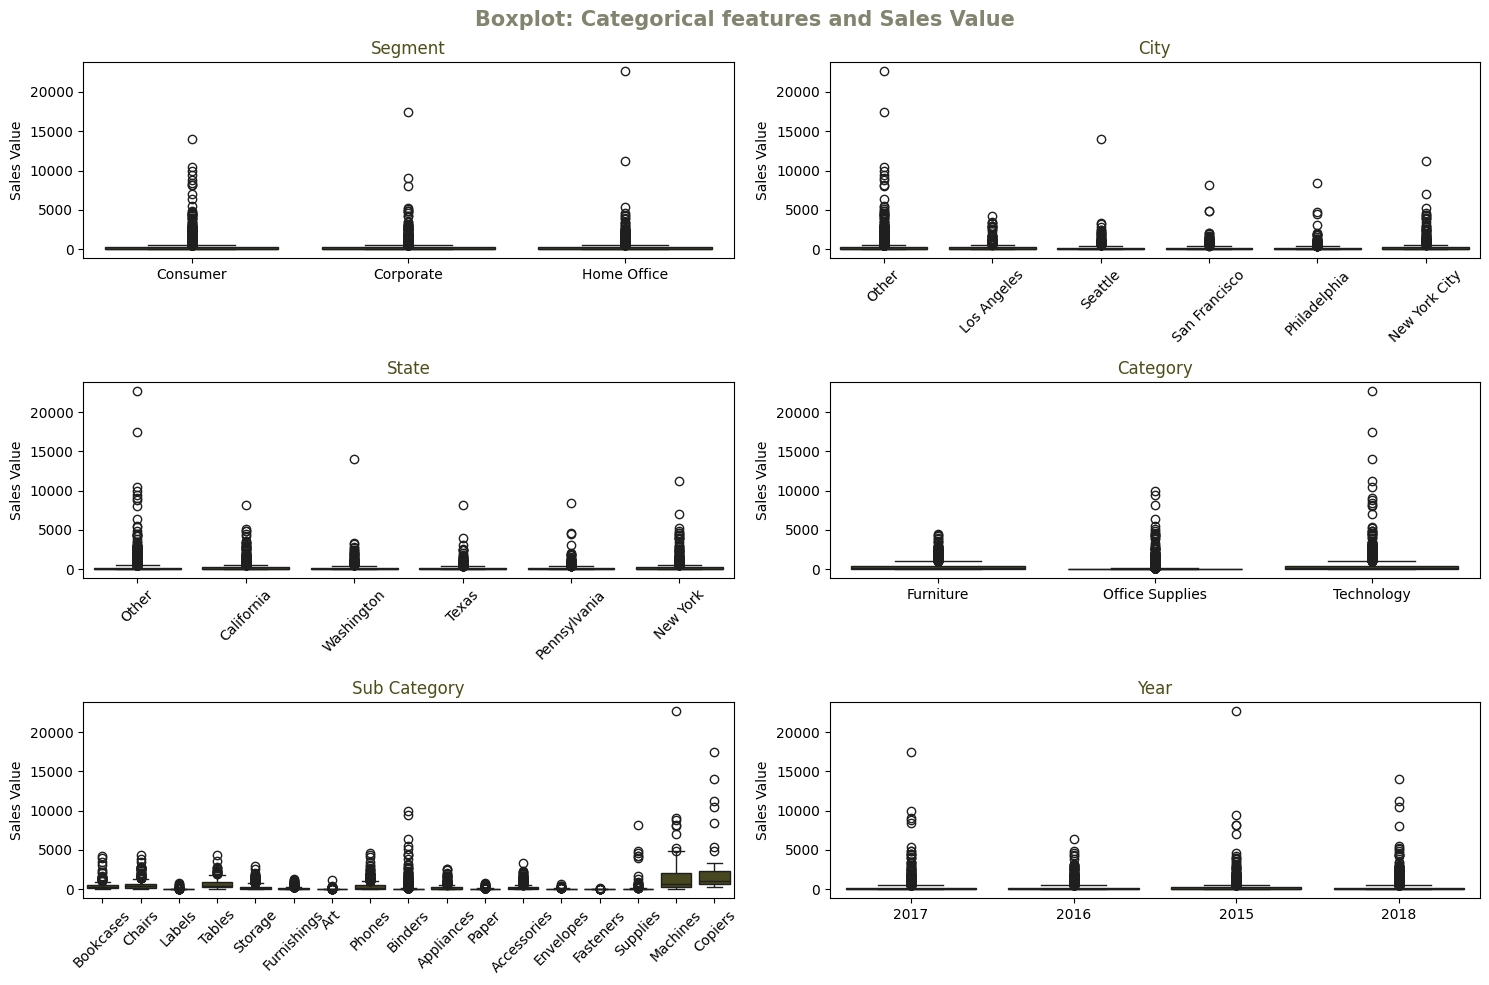

In [18]:
# Descriptive
print('\n')
display(Markdown('**Descriptive statistics: central tendency, dispersion and shape, excluding NaN values:**'))

# Plot
plt.figure(figsize=(15, 10))

# Figure title
plt.suptitle('Boxplot: Categorical features and Sales Value',fontsize=15,fontweight='bold',alpha=0.6, color='#31330f')

####################################################################################################

## Segment

# Describe
display(Markdown('**Segment**'))
display(df.groupby('Segmento')['Valor_Venda'].describe().reset_index())
print('\n')

# Plot1 
plt.subplot(321)
sns.boxplot(x='Segmento', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt.title('Segment', color='#4d4e19')
###################################################################################################

## City

# Describe
display(Markdown('**City**'))
display(df.groupby('cidade_group')['Valor_Venda'].describe().reset_index())
print('\n')

# Plot2
plt.subplot(322)
sns.boxplot(x='cidade_group', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.title('City', color='#4d4e19')
###################################################################################################

## State

# Describe
display(Markdown('**State**'))
display(df.groupby('estado_group')['Valor_Venda'].describe().reset_index())
print('\n')

# Plot3
plt.subplot(323)
sns.boxplot(x='estado_group', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.title('State', color='#4d4e19')
###################################################################################################

## Category

# Describe
display(Markdown('**Category**'))
display(df.groupby('Categoria')['Valor_Venda'].describe().reset_index())
print('\n')

# Plot4
plt.subplot(324)
sns.boxplot(x='Categoria', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt.title('Category', color='#4d4e19')
###################################################################################################

## Sub Category

# Describe
display(Markdown('**Subcategory**'))
display(df.groupby('SubCategoria')['Valor_Venda'].describe().reset_index())
print('\n')

# Plot5
plt.subplot(325)
sns.boxplot(x='SubCategoria', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.title('Sub Category', color='#4d4e19')
###################################################################################################

## Year

# Describe
display(Markdown('**Year**'))
display(df.groupby('Data_Pedido_ano')['Valor_Venda'].describe().reset_index())

# Plot1 - with outliers
plt.subplot(326)
sns.boxplot(x='Data_Pedido_ano', y='Valor_Venda', data=df, color='#4d4e19')
plt.xlabel(None)
plt.ylabel('Sales Value')
plt. title('Year', color='#4d4e19')
###################################################################################################

# Show
plt.tight_layout()
plt.show()

In [19]:
#Hypothesis Test
display(Markdown('**----- Hypothesis Test -----**'))

print("Test for Significant Differences in Sales Value Means Between Groups:")
print('\n')

display(Markdown('**H0:** The mean Sales Value is not significantly different between groups'))
display(Markdown('**H1:** The mean Sales Value is significantly different between groups'))
print('\n')

print('We will use the One-Way ANOVA method, which is designed to compare the means of three or more populations.') 
print('\n')

print('The assumptions for the test are met:')
display(Markdown('- Random samples'))
display(Markdown('- Independent groups'))
display(Markdown('- The dependent variable is continuous (Sales Value)'))
display(Markdown('- Each group have more than 15 or 20 observations'))      

print('\n')
print("In order to use the One-Way ANOVA method, the groups should have approximately equal variances. We will test this assumption, and if it is not met, we will use the Welch's ANOVA method as an alternative.")
print('----------------------------------------------------------------------------------------------------------------------------')
print('\n')

# check variance
def check_equalvariance(*colGroup):
    print('1.Check variance:')
    estT, pval = stats.bartlett(*colGroup)
    if pval < 0.5:
        print(f'p-value < 0.05: There is a significant difference in the variances between the groups for {valTest}. \n')
        return False
    else:
        print(f'p-value > 0.05: There is no significant difference in the variances between the groups for {valTest}. \n')
        return True

# test
def perfom_test(*colGroup, data, varEqI, group):
    print('2.Perform Test:')
    # For equal variance 
    if varEqI == True:
        estT, pval = stats.f_oneway(*colGroup)
        if pval < 0.05:
            print(f'p-value < 0.05: There is a significant difference in the mean values across the groups for {valTest}.')
            return False
        else:
            print(f'p-value > 0.05: There is no significant difference in the mean values across the groups for {valTest}.')
            return True
    # For not equal variance        
    else:
        test = pg.welch_anova(dv='Valor_Venda', between=group, data=data)
        pval = test['F'].values
        if pval < 0.05:
            print(f'p-value < 0.05: There is a significant difference in the mean values across the groups for {valTest}.')
            return False
        else:
            print(f'p-value > 0.05: There is no significant difference in the mean values across the groups for {valTest}.')
            return True


display(Markdown('**-> Segment**'))
valTest = 'Segmento'

# group
SegCons = df[df[valTest] == 'Consumer']['Valor_Venda']
SegCorp = df[df[valTest] == 'Corporate']['Valor_Venda']
SegHO = df[df[valTest] == 'Home Office']['Valor_Venda']

# variance
varEq = check_equalvariance(SegCons, SegCorp, SegHO)
# test
test = perfom_test(SegCons, SegCorp, SegHO, data=df, varEqI=varEq, group=valTest)

print('\n')
print('-------------######----------------')
print('\n')

valTest = 'Categoria'
display(Markdown('**-> Category**'))

# group
CatFur = df[df[valTest] == 'Furniture']['Valor_Venda']
CatOS = df[df[valTest] == 'Office Supplies']['Valor_Venda']
CatTec = df[df[valTest] == 'Technology']['Valor_Venda']

# variance
varEq = check_equalvariance(CatFur, CatOS, CatTec)
# test
test = perfom_test(CatFur, CatOS, CatTec, data=df, varEqI=varEq, group=valTest)

print('\n')
print('-------------######----------------')
print('\n')

valTest = 'Data_Pedido_ano'
display(Markdown('**-> Year**'))

# group
Ano18 = df[df[valTest] == '2018']['Valor_Venda']
Ano17 = df[df[valTest] == '2017']['Valor_Venda']
Ano16 = df[df[valTest] == '2016']['Valor_Venda']
Ano15 = df[df[valTest] == '2015']['Valor_Venda']

# variance
varEq = check_equalvariance(Ano18, Ano17, Ano16, Ano15)
# test
test = perfom_test(Ano18, Ano17, Ano16, Ano15, data=df, varEqI=varEq, group=valTest)

print('\n')
print('-------------######----------------')
print('\n')

valTest = 'cidade_group'
display(Markdown('**-> City**'))

# group
CityOther = df[df[valTest] == 'Other']['Valor_Venda']
CityNY = df[df[valTest] == 'New York City']['Valor_Venda']
CityLA = df[df[valTest] == 'Los Angeles']['Valor_Venda']
CityPhi = df[df[valTest] == 'Philadelphia']['Valor_Venda']
CitySanF = df[df[valTest] == 'San Francisco']['Valor_Venda']
CitySea = df[df[valTest] == 'Seattle']['Valor_Venda']

# variance
varEq = check_equalvariance(CityOther, CityNY, CityLA, CityPhi, CitySanF, CitySea)
# test
test = perfom_test(CityOther, CityNY, CityLA, CityPhi, CitySanF, CitySea, data=df, varEqI=varEq, group=valTest)

print('\n')
print('-------------######----------------')
print('\n')

valTest = 'estado_group'
display(Markdown('**-> State**'))

# group
StaOther = df[df[valTest] == 'Other']['Valor_Venda']
StaCali = df[df[valTest] == 'California']['Valor_Venda']
StaNY = df[df[valTest] == 'New York']['Valor_Venda']
StaTex = df[df[valTest] == 'Texas']['Valor_Venda']
StaPenn = df[df[valTest] == 'Pennsylvania']['Valor_Venda']
StaWash = df[df[valTest] == 'Washington']['Valor_Venda']

# variance
varEq = check_equalvariance(StaOther, StaCali, StaNY, StaTex, StaPenn, StaWash)
# test
test = perfom_test(StaOther, StaCali, StaNY, StaTex, StaPenn, StaWash, data=df, varEqI=varEq, group=valTest)


**----- Hypothesis Test -----**

Test for Significant Differences in Sales Value Means Between Groups:




**H0:** The mean Sales Value is not significantly different between groups

**H1:** The mean Sales Value is significantly different between groups



We will use the One-Way ANOVA method, which is designed to compare the means of three or more populations.


The assumptions for the test are met:


- Random samples

- Independent groups

- The dependent variable is continuous (Sales Value)

- Each group have more than 15 or 20 observations



In order to use the One-Way ANOVA method, the groups should have approximately equal variances. We will test this assumption, and if it is not met, we will use the Welch's ANOVA method as an alternative.
----------------------------------------------------------------------------------------------------------------------------




**-> Segment**

1.Check variance:
p-value < 0.05: There is a significant difference in the variances between the groups for Segmento. 

2.Perform Test:
p-value > 0.05: There is no significant difference in the mean values across the groups for Segmento.


-------------######----------------




**-> Category**

1.Check variance:
p-value < 0.05: There is a significant difference in the variances between the groups for Categoria. 

2.Perform Test:
p-value > 0.05: There is no significant difference in the mean values across the groups for Categoria.


-------------######----------------




**-> Year**

1.Check variance:
p-value < 0.05: There is a significant difference in the variances between the groups for Data_Pedido_ano. 

2.Perform Test:
p-value > 0.05: There is no significant difference in the mean values across the groups for Data_Pedido_ano.


-------------######----------------




**-> City**

1.Check variance:
p-value < 0.05: There is a significant difference in the variances between the groups for cidade_group. 

2.Perform Test:
p-value > 0.05: There is no significant difference in the mean values across the groups for cidade_group.


-------------######----------------




**-> State**

1.Check variance:
p-value < 0.05: There is a significant difference in the variances between the groups for estado_group. 

2.Perform Test:
p-value > 0.05: There is no significant difference in the mean values across the groups for estado_group.


***

***

## Businesses Questions

**Question 1:** Which City has the Highest Sales Value for Products in the 'Office Supplies' Category?

In [20]:
p1 = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade').aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=False)
p1

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687
...,...,...
316,Ormond Beach,2.808
331,Pensacola,2.214
202,Jupiter,2.064
129,Elyria,1.824


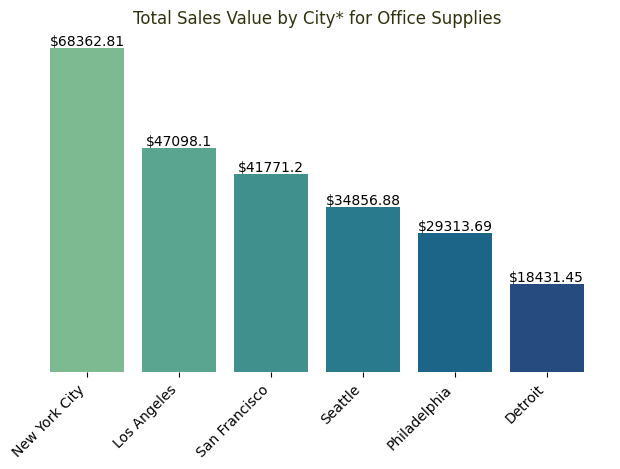

In [21]:
# Create the plot
bars = plt.bar(x=p1['Cidade'][0:6], height=p1['Valor_Venda'][0:6], color=col,width = 0.8)

# Edit x axis names
plt.gca().set_xticks(p1['Cidade'][0:6], labels=p1['Cidade'][0:6], rotation=45, ha='right')

# Add label
labels = [f'${round(p1["Valor_Venda"][i],2)}' for i in p1['Valor_Venda'][0:6].index]
plt.bar_label(bars,labels=labels)

# Title
plt.title('Total Sales Value by City* for Office Supplies', color='#31330f')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

\* The plot shows the 6 most high values

**Answer:** New York is the city with the highest sales value of products in the Office Supplies category ($68362.81)

----------------------------------------------------------------------------------------------------------------------

**Question 2:** What is the Total Sales by Order Date?

In [22]:
p2_1 = df.groupby('Data_Pedido_ano').aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=True)
p2_1

,Data_Pedido_ano,Valor_Venda
1,2016,454072.5154
0,2015,470768.6001
2,2017,595365.9240
3,2018,715350.9152


In [23]:
p2_2 = df.groupby('Data_Pedido_mes').aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=False)
p2_2

,Data_Pedido_mes,Valor_Venda
10,11,342107.4710
11,12,319795.1235
8,09,298065.2657
9,10,197404.2807
2,03,194122.7452
7,08,155861.2650
4,05,153198.0277
5,06,145282.3433
6,07,141891.5970
3,04,135712.7686


In [24]:
p2_22 = df.groupby(['Data_Pedido_ano','Data_Pedido_mes']).aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by=['Data_Pedido_ano','Data_Pedido_mes'], ascending=True)
p2_22

,Data_Pedido_ano,Data_Pedido_mes,Valor_Venda
0,2015,01,14205.7070
1,2015,02,3959.3420
2,2015,03,55205.7970
3,2015,04,27336.6230
4,2015,05,23457.3950
5,2015,06,34183.1356
6,2015,07,31124.8270
7,2015,08,25700.1865
8,2015,09,80805.7288
9,2015,10,31453.3930


In [25]:
p2_3 = df.groupby(['Data_Pedido','Data_Pedido_dt']).aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=False)
p2_3

,Data_Pedido,Data_Pedido_dt,Valor_Venda
689,18/03/2015,2015-03-18,28106.716
70,02/10/2017,2017-10-02,18452.972
876,22/10/2018,2018-10-22,15158.877
895,23/03/2018,2018-03-23,14816.068
304,08/09/2015,2015-09-08,14228.428
...,...,...,...
26,01/10/2015,2015-10-01,4.710
943,24/06/2015,2015-06-24,4.272
1086,28/01/2015,2015-01-28,3.928
459,12/07/2018,2018-07-12,3.816


/tmp/ipykernel_39899/1850079863.py:25: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  bars3 = sns.barplot(p2_22, x='Data_Pedido_mes', y='Valor_Venda', hue="Data_Pedido_ano", palette=col)


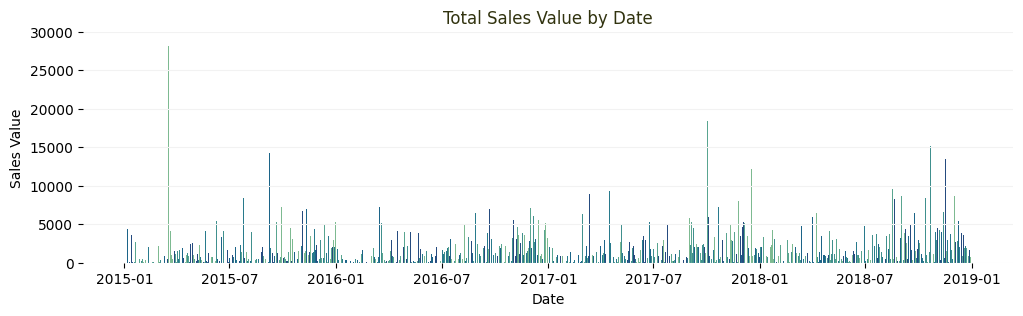

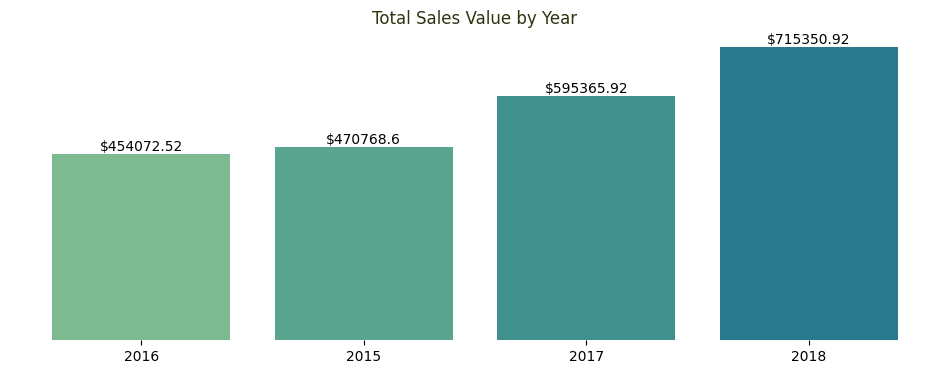

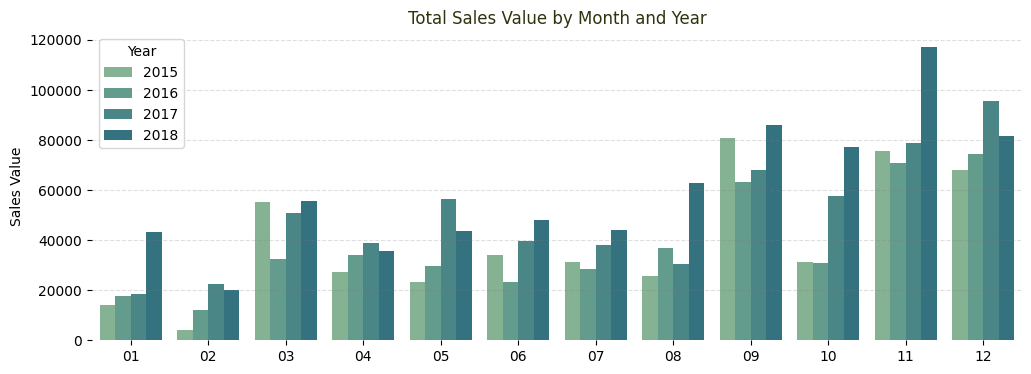

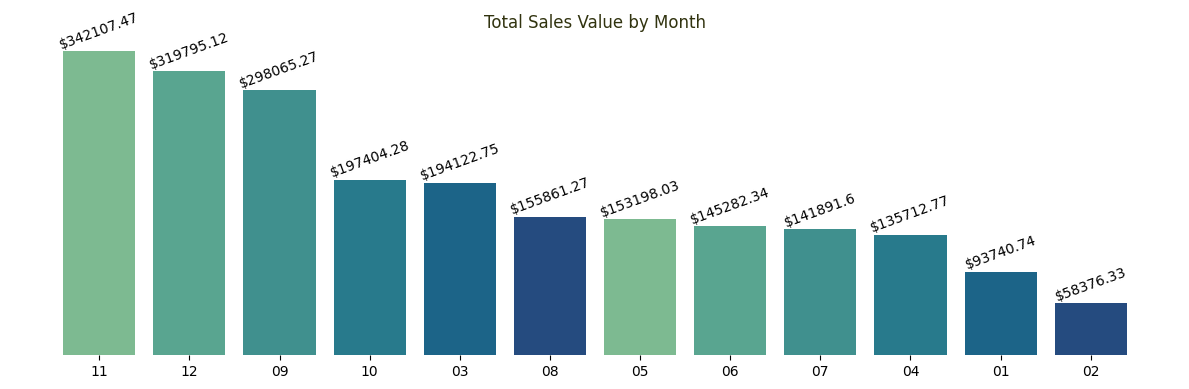

In [26]:
# Plot1
fig = plt.figure(figsize=(12, 3))
bars1 = plt.bar(x=p2_3['Data_Pedido_dt'], height=p2_3['Valor_Venda'], color=col, width = 0.8)
plt.title('Total Sales Value by Date', color='#31330f') # Title
plt.ylim([0, 30000])
plt.grid(axis='y', color='0.95')
plt.ylabel('Sales Value')
plt.xlabel('Date')
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders


# Plot2
fig = plt.figure(figsize=(12, 4))
bars2 = plt.bar(x=p2_1['Data_Pedido_ano'], height=p2_1['Valor_Venda'], color=col,width = 0.8)
plt.gca().set_xticks(p2_1['Data_Pedido_ano'], labels=p2_1['Data_Pedido_ano'], ha='center')
#Labels
labels = [f'${round(p2_1["Valor_Venda"][i],2)}' for i in p2_1['Data_Pedido_ano'].index]
plt.bar_label(bars2,labels=labels)
plt.title('Total Sales Value by Year', color='#31330f') # Title
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders

# Plot3
plt.figure(figsize=(12, 4))
bars3 = sns.barplot(p2_22, x='Data_Pedido_mes', y='Valor_Venda', hue="Data_Pedido_ano", palette=col)
bars3.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Sales Value')
plt.xlabel(None)
plt.legend(title='Year')
plt.title('Total Sales Value by Month and Year', color='#31330f')
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders

# Plot4
plt.figure(figsize=(12, 4))
bars4 = plt.bar(x=p2_2['Data_Pedido_mes'], height=p2_2['Valor_Venda'], color=col,width = 0.8)
plt.gca().set_xticks(p2_2['Data_Pedido_mes'], labels=p2_2['Data_Pedido_mes'],  ha='center')
#Label
labels = [f'${round(p2_2["Valor_Venda"][i],2)}' for i in p2_2['Data_Pedido_mes'].index]
plt.bar_label(bars4,labels=labels,rotation=20)
plt.title('Total Sales Value by Month', color='#31330f') # Title
plt.yticks([]) # Removing y axis
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders

# layout
plt.tight_layout()

----------------------------------------------------------------------------------------------------------------------

**Question 3:** What is the Total Sales by State?

In [27]:
p3 = df.groupby('Estado').aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=False)
p3

,Estado,Valor_Venda
3,California,442927.0975
30,New York,304536.4010
41,Texas,163549.8602
45,Washington,133826.0060
36,Pennsylvania,114411.6800
8,Florida,88043.7000
11,Illinois,78109.9270
20,Michigan,76081.1740
33,Ohio,74277.8020
44,Virginia,68194.6700


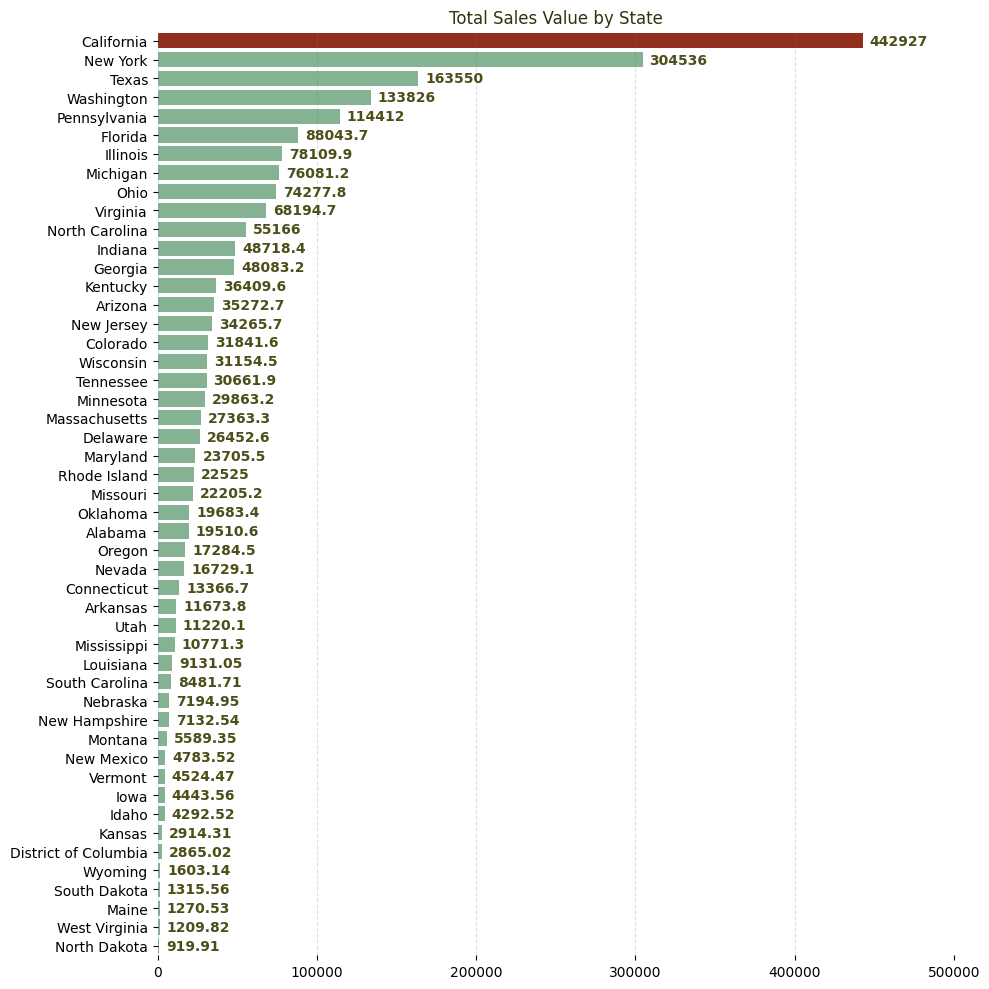

In [28]:
# Create the plot
plt.figure(figsize=(10,10))
cols = ['#a62009' if (x > 442927) else col[0] for x in p3['Valor_Venda']]
ax = sns.barplot(y=p3['Estado'], x=p3['Valor_Venda'], hue = p3['Estado'],palette=cols,width = 0.8)

# Add label
for container in ax.containers:
    ax.bar_label(container,padding=5, color='#4d4e19', fontweight='bold')

ax.set_xlim([0, 500000])
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.xlabel(None)
plt.ylabel(None)

plt.title('Total Sales Value by State', color= '#31330f')

# # Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# # Adjust layout 
plt.tight_layout()

-----------------------------------------------------------------------------------------------------------------------

**Question 4:** What are the Top 10 Cities with the Highest Total Sales?

In [29]:
p4 = df.groupby('Cidade').aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda', ascending=False)
p4

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803
...,...,...
352,Ormond Beach,2.808
368,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824


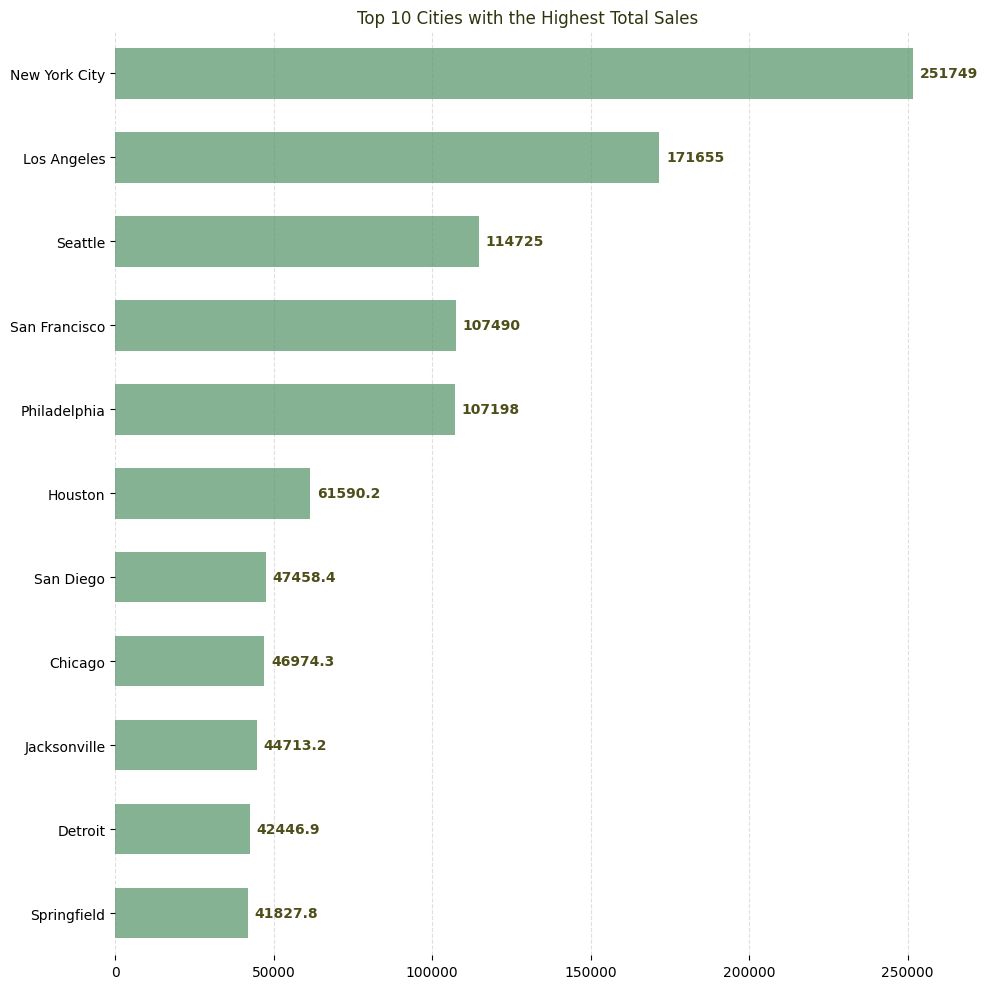

In [30]:
# Create the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(y=p4['Cidade'][0:11], x=p4['Valor_Venda'][0:11], color = col[0],width = 0.6)

# Add label
for container in ax.containers:
    ax.bar_label(container,padding=5, color='#4d4e19', fontweight='bold')

ax.set_xlim([0, 260000])
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.title('Top 10 Cities with the Highest Total Sales', color='#31330f')

plt.xlabel(None)
plt.ylabel(None)


# # Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# # Adjust layout 
plt.tight_layout()

----------------------------------------------------------------------------------------------------------------------

**Question 5:** Which Segment Had the Highest Total Sales?

In [31]:
df['Segmento'].value_counts()

Segmento
Consumer       5039
Corporate      2930
Home Office    1731
Name: count, dtype: int64

In [32]:
p5 = df.groupby('Segmento').aggregate({'Valor_Venda':'sum'}).reset_index()
p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [34]:
p5

,Segmento,Valor_Venda
0,Consumer,1133834.335
1,Corporate,679232.187
2,Home Office,422491.433


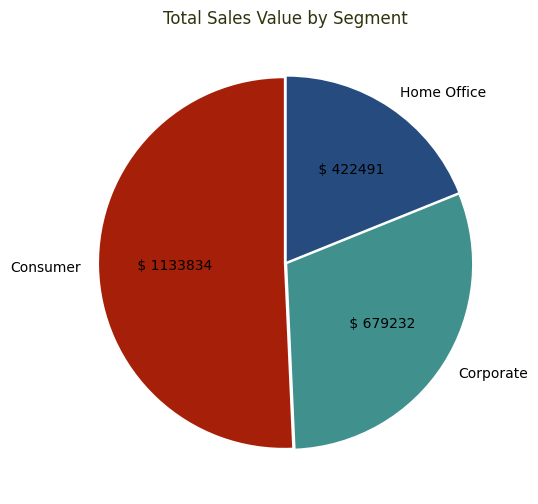

In [35]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

# Figsize
plt.figure(figsize = (16, 6))
plt.title('Total Sales Value by Segment', color = '#31330f') 

# Plot
plt.pie(p5['Valor_Venda'], 
        labels = p5['Segmento'],
        autopct = autopct_format(p5['Valor_Venda']),
        colors=col2,
        startangle=90,
        explode=[0.01, 0.01, 0.01]);

----------------------------------------------------------------------------------------------------------------------

**Question 6:** What is the Total Sales by Segment and by Year?

In [36]:
p6 = df.groupby(['Data_Pedido_ano','Segmento']).aggregate({'Valor_Venda':'sum'})
p6

Valor_Venda
Data_Pedido_ano Segmento                
2015            Consumer      256719.917
                Corporate     125819.596
                Home Office    88229.088
2016            Consumer      265295.259
                Corporate     114643.123
                Home Office    74134.133
2017            Consumer      288459.557
                Corporate     203266.740
                Home Office   103639.627
2018            Consumer      323359.602
                Corporate     235502.728
                Home Office   156488.585

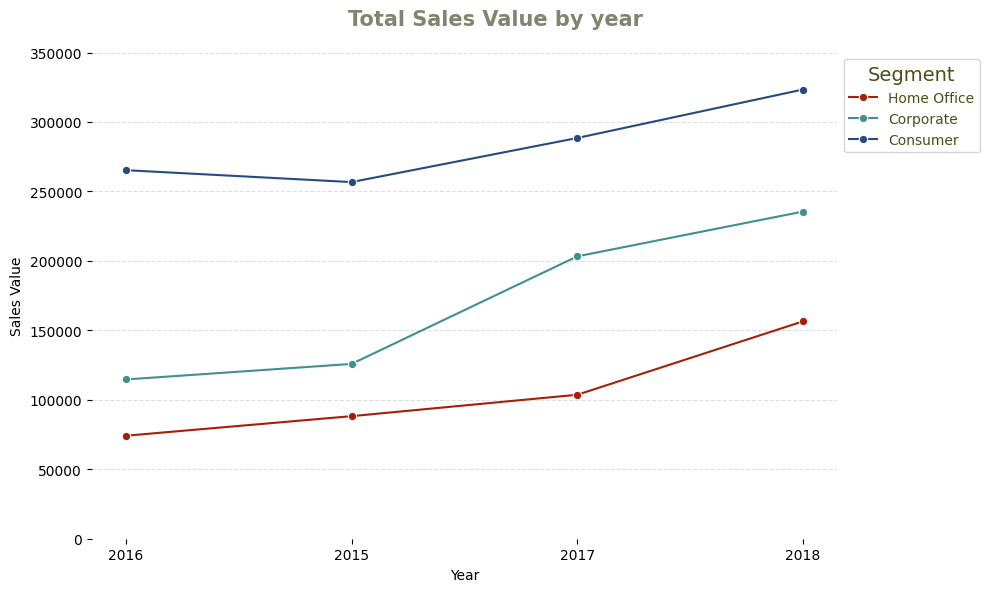

In [37]:
# Plot
plt.figure(figsize=(10, 6))

# Figure title
plt.suptitle('Total Sales Value by year',fontsize=15,fontweight='bold',alpha=0.6, color='#31330f')

ax = sns.lineplot(x='Data_Pedido_ano', y='Valor_Venda', hue='Segmento', data=p6.sort_values(by='Valor_Venda'), marker='o', palette=col2)
# Legend
plt.legend(title='Segment')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='14', color='#4d4e19') 
plt.setp(ax.get_legend().get_texts(), fontsize='10', color='#4d4e19') 
# Axis
ax.set_ylim([0, 350000])
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.gca().spines[['right','top','left','bottom']].set_visible(False) # Removing the borders

# Adjust layout 
plt.tight_layout()

----------------------------------------------------------------------------------------------------------------------

**Question 7:** The company managers are considering offering different discount tiers and would like to run a simulation based on the following rule:
  
    - If the Sales Value is greater than 1000, it receives a 15% discount.
    - If the Sales Value is less than 1000, it receives a 10% discount.
    
      How many Sales would receive a 15% discount?

In [38]:
(df['Valor_Venda'] == 1000).value_counts()

Valor_Venda
False    9700
Name: count, dtype: int64

In [39]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 15, 10)
df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,cidade_group,estado_group,Data_Pedido_dt,Data_Pedido_ano,Data_Pedido_mes,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.960,Other,Other,2017-11-08,2017,11,10
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.940,Other,Other,2017-11-08,2017,11,10
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620,Los Angeles,California,2017-06-12,2017,06,10


In [40]:
p7 = df.groupby('Desconto').aggregate({'Valor_Venda':'count'}).reset_index().rename(columns={'Valor_Venda':'Qt_Venda'})
p7

,Desconto,Qt_Venda
0,10,9243
1,15,457


In [41]:
(p7[p7['Desconto']==15]['Qt_Venda']/p7['Qt_Venda'].sum())*100

1   4.711
Name: Qt_Venda, dtype: float64

457 (4,72%) Sales would receive 15% discount

----------------------------------------------------------------------------------------------------------------------

**Question 8:** Assume the company decides to grant a 15% discount from the previous item. What would be the average Sale_Value before and after the discount?


In [42]:
df['Valor_Venda_Desconto'] = np.where(df['Desconto']==15, df['Valor_Venda']*0.85, df['Valor_Venda'])
df. head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,cidade_group,estado_group,Data_Pedido_dt,Data_Pedido_ano,Data_Pedido_mes,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.960,Other,Other,2017-11-08,2017,11,10,261.960
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.940,Other,Other,2017-11-08,2017,11,10,731.940
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620,Los Angeles,California,2017-06-12,2017,06,10,14.620
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.577,Other,Other,2016-10-11,2016,10,10,957.577
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368,Other,Other,2016-10-11,2016,10,10,22.368


In [43]:
df[df['Desconto'] == 15][['Valor_Venda','Valor_Venda_Desconto']]

,Valor_Venda,Valor_Venda_Desconto
10,1706.184,1450.256
24,1044.630,887.936
27,3083.430,2620.915
35,1097.544,932.912
54,1029.950,875.457
...,...,...
9632,1628.820,1384.497
9636,4297.644,3652.997
9646,3406.664,2895.664
9657,3023.928,2570.339


In [44]:
p8 = df.groupby('Desconto').aggregate({'Valor_Venda':'mean', 'Valor_Venda_Desconto':'mean'}).reset_index().rename(columns={'Valor_Venda':'Media_Antes','Valor_Venda_Desconto':'Media_Depois'})
p8

,Desconto,Media_Antes,Media_Depois
0,10,137.204,137.204
1,15,2116.808,1799.287


The average before the discount is 2116.81 and after is 1799.28

----------------------------------------------------------------------------------------------------------------------

**Question 9:** What is the Average Sales by Segment, by Year, and by Month?

In [45]:
p9 = df.groupby(['Segmento','Data_Pedido_ano','Data_Pedido_mes']).aggregate({'Valor_Venda':'mean'}).reset_index().rename(columns={'Valor_Venda':'Media_Valor_Venda'})
p9

,Segmento,Data_Pedido_ano,Data_Pedido_mes,Media_Valor_Venda
0,Consumer,2015,01,146.737
1,Consumer,2015,02,117.328
2,Consumer,2015,03,152.171
3,Consumer,2015,04,189.763
4,Consumer,2015,05,191.337
...,...,...,...,...
139,Home Office,2018,08,176.161
140,Home Office,2018,09,249.141
141,Home Office,2018,10,412.577
142,Home Office,2018,11,247.519


<Figure size 1200x600 with 0 Axes>

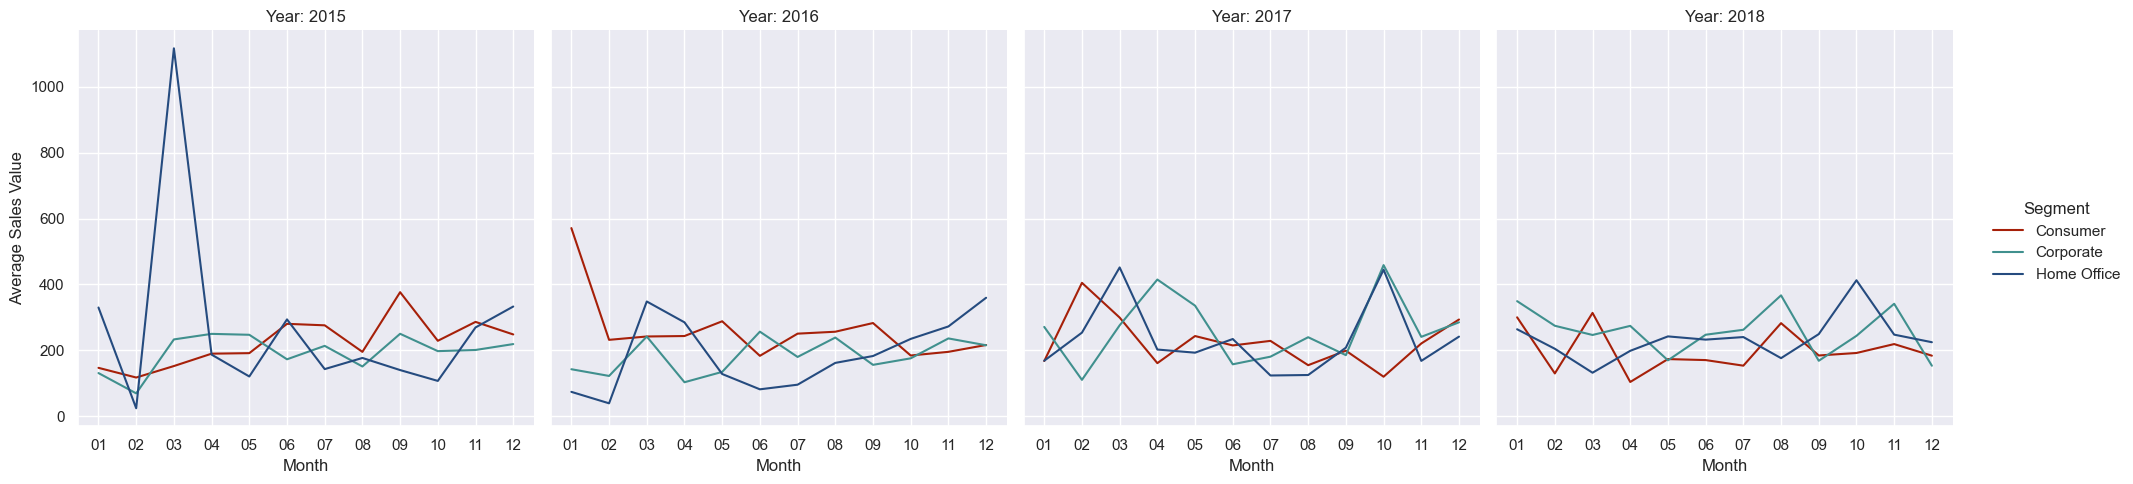

In [46]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = p9, 
                   y = 'Media_Valor_Venda', 
                   x = 'Data_Pedido_mes',
                   hue = 'Segmento', 
                   col = 'Data_Pedido_ano',
                   col_wrap = 4,
                  palette=col2,
                  markers=True)

# Adjust labels, title, layout
(fig1.set_axis_labels("Month", "Average Sales Value")
  .set_titles("Year: {col_name}")
  .tight_layout(w_pad=1)
  ._legend.set_title("Segment"))
plt.show()

----------------------------------------------------------------------------------------------------------------------

**Question 10:** What is the Total Sales by Category and SubCategory, Considering Only the Top 12 SubCategories?

In [47]:
p10 = df.groupby(['Categoria','SubCategoria']).aggregate({'Valor_Venda':'sum'}).reset_index().sort_values(by='Valor_Venda',ascending=False)
p10

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.294
1,Furniture,Chairs,317919.625
11,Office Supplies,Storage,216188.362
3,Furniture,Tables,202083.360
6,Office Supplies,Binders,194723.381
15,Technology,Machines,189238.631
13,Technology,Accessories,162791.362
14,Technology,Copiers,146248.094
0,Furniture,Bookcases,108045.047
4,Office Supplies,Appliances,104061.693


In [48]:
p10_ = p10[0:12]
p10_

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.294
1,Furniture,Chairs,317919.625
11,Office Supplies,Storage,216188.362
3,Furniture,Tables,202083.360
6,Office Supplies,Binders,194723.381
15,Technology,Machines,189238.631
13,Technology,Accessories,162791.362
14,Technology,Copiers,146248.094
0,Furniture,Bookcases,108045.047
4,Office Supplies,Appliances,104061.693


In [49]:
p10_2 = p10_.sort_values(by='Categoria')
p10_2

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919.625
3,Furniture,Tables,202083.360
0,Furniture,Bookcases,108045.047
2,Furniture,Furnishings,88862.770
11,Office Supplies,Storage,216188.362
6,Office Supplies,Binders,194723.381
4,Office Supplies,Appliances,104061.693
10,Office Supplies,Paper,76312.764
16,Technology,Phones,325271.294
15,Technology,Machines,189238.631


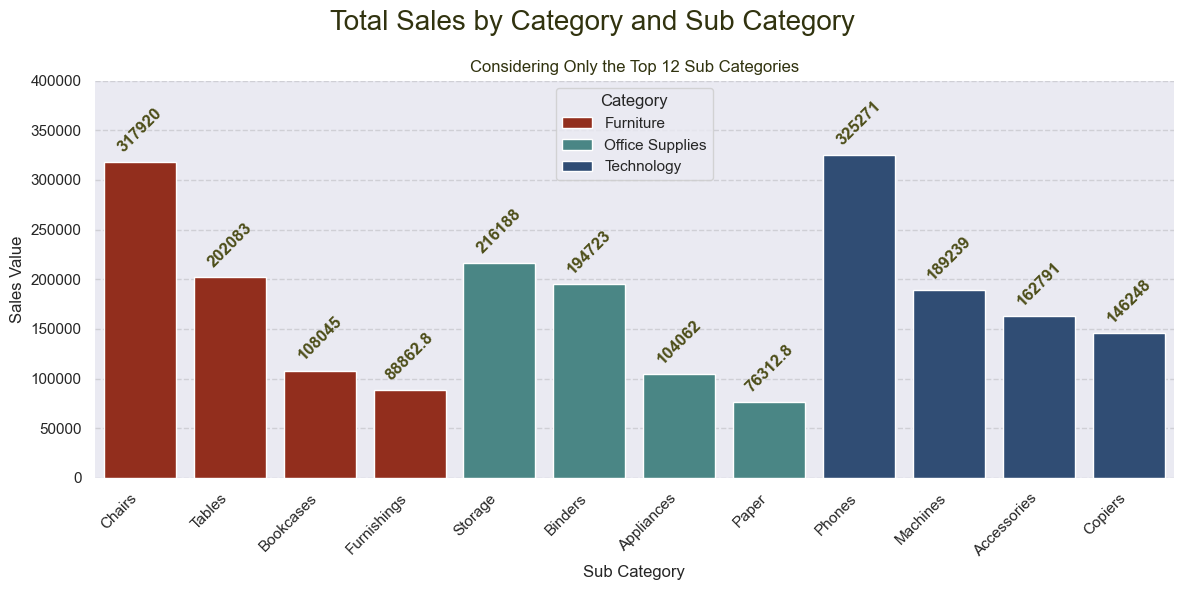

In [50]:
# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x='SubCategoria', y='Valor_Venda', hue='Categoria', data=p10_2, palette=col2)

# Edit x axis names
plt.gca().set_xticks(p10_2['SubCategoria'], labels=p10_2['SubCategoria'], rotation=45, ha='right')

# Y axis
ax.set_ylim([0, 400000])
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Sales Value')
plt.xlabel('Sub Category')

# Add label
for container in ax.containers:
    ax.bar_label(container,padding=5, color='#4d4e19', fontweight='bold', rotation=45)

plt.suptitle('Total Sales by Category and Sub Category', fontsize='20', color = '#31330f')
plt.title('Considering Only the Top 12 Sub Categories', color = '#31330f')


# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

plt.legend(title='Category', loc='upper center')

# Adjust layout 
plt.tight_layout()

----------------------------------------------------------------------------------------------------------------------